In [1]:
# for reading writing and visulaizing the image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for creating the model
import torch
import torchvision
import torchvision.transforms as transforms
from time import time
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchsummary import summary

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


##### LOADING THE DATASET

In [3]:
dataset = pd.read_csv('data//train.csv')
pred_dataset =  pd.read_csv('data//test.csv')

In [4]:
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pred_dataset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### DEFINING THE DATALOADERS

In [6]:
# .values gives the datasets as numpy arrays and when we give them to dataloaders they automatically transform them to tensors
dataset = dataset.values 
pred_dataset = pred_dataset.values
train_dataset, test_dataset = torch.utils.data.random_split(dataset, (41936, 64)) # used almost all of data in training as i felt data is less but data augmentation could be performed in this case  
train_dataloader =  DataLoader(train_dataset, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = 64, shuffle= True)

In [7]:
print(next(iter(train_dataloader)).shape)
next(iter(train_dataloader))

torch.Size([64, 785])


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [9, 0, 0,  ..., 0, 0, 0],
        ...,
        [8, 0, 0,  ..., 0, 0, 0],
        [6, 0, 0,  ..., 0, 0, 0],
        [7, 0, 0,  ..., 0, 0, 0]])

In [8]:
print(next(iter(test_dataloader)).shape)
next(iter(test_dataloader))

torch.Size([1, 785])


tensor([[  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
         206, 170,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 174,
         253, 183,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 245,
         243,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 188, 253,
         226,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0

#### DISPLAYING THE IMAGES

In [9]:
def PlotBatch(data_loader, batch_size = 64):
  batch = next(iter(data_loader))  # first batch of data_loader
  fig = plt.figure(figsize=(16,4))
  for i in range(16):
    fig.add_subplot(2,8,i+1)
    temp = batch[i,1:]
    plt.imshow(temp.reshape(28,28), cmap='gray')
    plt.title(batch[i,0].item())
    plt.axis('off')

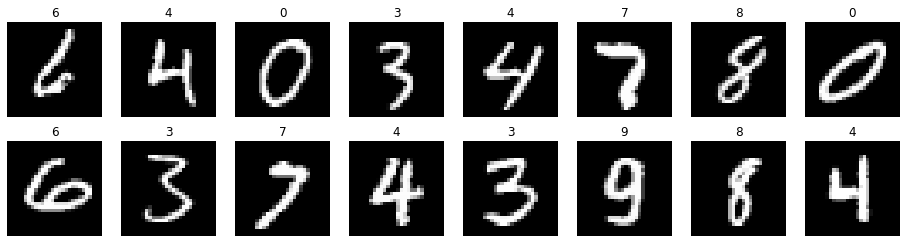

In [10]:
PlotBatch(train_dataloader)

#### MODEL

In [11]:
from LeNet import LeNet

In [12]:
transform = transforms.Pad((2,2))
model = LeNet().to(device)
summary(model, (32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
            Conv2d-5            [-1, 120, 1, 1]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


In [13]:
def train(epochs, batch_size = 64, print_every = 20):
  total_loss = 0 # average of losses over all of the batches
  accuracy = []
  tic = time()

  for i, batch in enumerate(train_dataloader,1):  # i represents number of batches starting from 1
    model_input = (batch[:,1:]/255.0).to(device)
    model_input = model_input.reshape(model_input.shape[0],28,28)
    model_input = transform(model_input)
    target = (batch[:,0]).to(device)

    model_output = model(model_input)
    loss = criterion(model_output, target)
    total_loss+= loss.item()  # as it is just a tensor of 0 dimension, so converting it to a scalar by .item() method
    # backpropoagation
    optimizer.zero_grad() # making the gradients equal to zero if there are previously any
    loss.backward()
    optimizer.step()  # updating the gradients

    res = model_output.argmax(dim=1)
    accuracy.append((res==target).sum().item()/batch_size) # accuracy over a batch

    if i%print_every==0:   # should print something after every 'print_every' no. of batches are processed
      print('Epoch [{}] ({}/{}), train_loss = {:.4f}, accuracy = {:.2f}, time = {:.2f} sec'.format(epoch, i, len(train_dataloader), loss.item(), sum(accuracy)/len(accuracy), time() - tic ))
  return total_loss/len(train_dataloader) # returns average loss of all batches


In [14]:
def test(epochs, batch_size = 64):
  total_loss = 0
  accuracy = []
  tic = time()
  
  with torch.no_grad():
    for i, batch in enumerate(test_dataloader, 0):
      model_input = (batch[:,1:]/255.0).to(device)
      model_input = model_input.reshape(model_input.shape[0],28,28)
      model_input = transform(model_input)
      target = (batch[:,0]).to(device)

      model_output = model(model_input)
      loss = criterion(model_output, target)
      total_loss+= loss.item()

      result = model_output.argmax(dim=1)
      accuracy.append((result==target).sum().item()/target.shape[0]) 
  print('Epoch: [{}], Test Loss: {:.4f}, Accuracy: {:.2f}, Time: {:.2f} sec'.format(
        epoch, total_loss/len(test_dataloader), sum(accuracy)/len(accuracy), time()-tic
    ))
  return total_loss/len(test_dataloader) # Returning Average Testing Loss

In [15]:
lr = 1e-3
model = LeNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()

In [16]:
train_loss = []
test_loss = []
for epoch in range(1, 50):
  train_loss.append(train(epoch, batch_size=64, print_every=100))
  test_loss.append(test(epoch, batch_size = 64))
  print("\n")

Epoch [1] (100/657), train_loss = 0.5765, accuracy = 0.59, time = 1.08 sec
Epoch [1] (200/657), train_loss = 0.5613, accuracy = 0.73, time = 1.94 sec
Epoch [1] (300/657), train_loss = 0.3151, accuracy = 0.79, time = 2.84 sec
Epoch [1] (400/657), train_loss = 0.1652, accuracy = 0.82, time = 3.79 sec
Epoch [1] (500/657), train_loss = 0.2415, accuracy = 0.84, time = 4.68 sec
Epoch [1] (600/657), train_loss = 0.1732, accuracy = 0.86, time = 5.57 sec
Epoch: [1], Test Loss: 0.0008, Accuracy: 1.00, Time: 0.00 sec


Epoch [2] (100/657), train_loss = 0.3038, accuracy = 0.95, time = 0.89 sec
Epoch [2] (200/657), train_loss = 0.0745, accuracy = 0.95, time = 1.78 sec
Epoch [2] (300/657), train_loss = 0.0941, accuracy = 0.96, time = 2.86 sec
Epoch [2] (400/657), train_loss = 0.1664, accuracy = 0.96, time = 6.35 sec
Epoch [2] (500/657), train_loss = 0.0577, accuracy = 0.96, time = 9.81 sec
Epoch [2] (600/657), train_loss = 0.0819, accuracy = 0.96, time = 13.31 sec
Epoch: [2], Test Loss: 0.0015, Accu

Epoch: [16], Test Loss: 0.0000, Accuracy: 1.00, Time: 0.01 sec


Epoch [17] (100/657), train_loss = 0.0001, accuracy = 1.00, time = 1.11 sec
Epoch [17] (200/657), train_loss = 0.0006, accuracy = 1.00, time = 2.19 sec
Epoch [17] (300/657), train_loss = 0.0234, accuracy = 1.00, time = 3.26 sec
Epoch [17] (400/657), train_loss = 0.0022, accuracy = 1.00, time = 4.37 sec
Epoch [17] (500/657), train_loss = 0.0014, accuracy = 1.00, time = 5.44 sec
Epoch [17] (600/657), train_loss = 0.0057, accuracy = 1.00, time = 6.56 sec
Epoch: [17], Test Loss: 0.0000, Accuracy: 1.00, Time: 0.00 sec


Epoch [18] (100/657), train_loss = 0.0011, accuracy = 1.00, time = 1.19 sec
Epoch [18] (200/657), train_loss = 0.0013, accuracy = 1.00, time = 2.36 sec
Epoch [18] (300/657), train_loss = 0.0047, accuracy = 1.00, time = 3.53 sec
Epoch [18] (400/657), train_loss = 0.0161, accuracy = 1.00, time = 4.63 sec
Epoch [18] (500/657), train_loss = 0.0005, accuracy = 1.00, time = 5.85 sec
Epoch [18] (600/657), train_loss =

Epoch [32] (600/657), train_loss = 0.0015, accuracy = 1.00, time = 7.60 sec
Epoch: [32], Test Loss: 0.0000, Accuracy: 1.00, Time: 0.00 sec


Epoch [33] (100/657), train_loss = 0.0104, accuracy = 1.00, time = 1.30 sec
Epoch [33] (200/657), train_loss = 0.0000, accuracy = 1.00, time = 2.57 sec
Epoch [33] (300/657), train_loss = 0.0038, accuracy = 1.00, time = 4.13 sec
Epoch [33] (400/657), train_loss = 0.0439, accuracy = 1.00, time = 5.48 sec
Epoch [33] (500/657), train_loss = 0.0003, accuracy = 1.00, time = 6.79 sec
Epoch [33] (600/657), train_loss = 0.0011, accuracy = 1.00, time = 8.08 sec
Epoch: [33], Test Loss: 0.0000, Accuracy: 1.00, Time: 0.00 sec


Epoch [34] (100/657), train_loss = 0.0010, accuracy = 1.00, time = 1.29 sec
Epoch [34] (200/657), train_loss = 0.0222, accuracy = 1.00, time = 2.56 sec
Epoch [34] (300/657), train_loss = 0.0009, accuracy = 1.00, time = 3.93 sec
Epoch [34] (400/657), train_loss = 0.0002, accuracy = 1.00, time = 5.15 sec
Epoch [34] (500/657), train_loss =

Epoch [48] (500/657), train_loss = 0.0003, accuracy = 1.00, time = 6.37 sec
Epoch [48] (600/657), train_loss = 0.0000, accuracy = 1.00, time = 7.60 sec
Epoch: [48], Test Loss: 0.0000, Accuracy: 1.00, Time: 0.00 sec


Epoch [49] (100/657), train_loss = 0.0000, accuracy = 1.00, time = 1.31 sec
Epoch [49] (200/657), train_loss = 0.0086, accuracy = 1.00, time = 2.54 sec
Epoch [49] (300/657), train_loss = 0.0007, accuracy = 1.00, time = 3.72 sec
Epoch [49] (400/657), train_loss = 0.0002, accuracy = 1.00, time = 4.91 sec
Epoch [49] (500/657), train_loss = 0.0001, accuracy = 1.00, time = 6.08 sec
Epoch [49] (600/657), train_loss = 0.0000, accuracy = 1.00, time = 7.25 sec
Epoch: [49], Test Loss: 0.0000, Accuracy: 1.00, Time: 0.00 sec




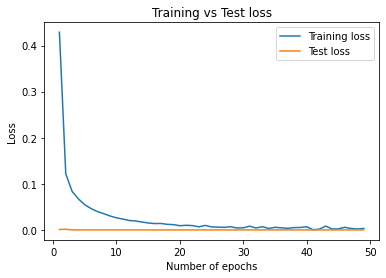

In [17]:
# plotting the test vs train loss curve
plt.plot(range(1, len(train_loss)+1), train_loss, label = "Training loss")
plt.plot(range(1, len(test_loss)+1), test_loss, label = "Test loss")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title("Training vs Test loss")
plt.legend()
plt.show()

In [18]:
# checking our results visually on the pred_set
def Check_model(start):  # from which example we have to plot
  fig = plt.figure(figsize=(16,4))
  for i in range(16):
    img_num = start + i
    input = ((torch.tensor(pred_dataset[img_num,:])/255.0).reshape(1,28,28)).to(device)
    input = transform(input)
    op = model(input)
    pred = op.argmax(dim=1).item()
    fig.add_subplot(2,8,i+1)
    input = input.to('cpu') # have to add this line as input was on gpu
    plt.imshow(input.reshape([32,32]), cmap = 'gray')
    plt.title(pred)
    plt.axis('off')

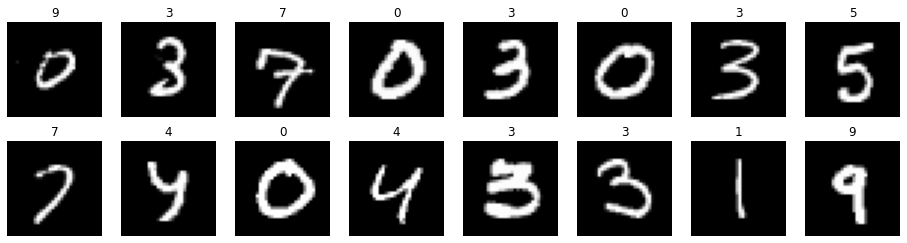

In [19]:
Check_model(3)  # model is performing quite well on the test set(acc=0.95) and on the pred set(by seeing the visualizations)

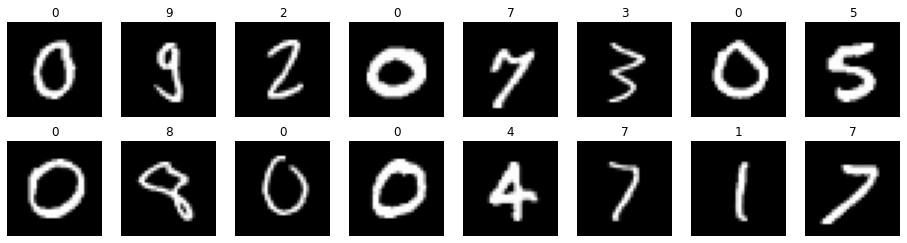

In [20]:
Check_model(100)

In [21]:
# predictions on the pred datset
def pred():
  image_id = np.arange(1, pred_dataset.shape[0]+1).reshape(pred_dataset.shape[0],1)
  res = np.zeros((pred_dataset.shape[0],1))
  for i in range(pred_dataset.shape[0]):
    input = ((torch.tensor(pred_dataset[i,:])/255.0).reshape(1,28,28)).to(device)
    input = transform(input)
    op = model(input)
    ans = op.argmax(dim=1).item()
    res[i] = ans
  pred_df = pd.DataFrame(np.concatenate((image_id.astype(np.int), res.astype(np.int)), axis=1))
  pred_df.columns = ['ImageId', 'Label']
  return pred_df

In [22]:
pred_df = pred()
pred_df.head()

C:\Users\Ayush\AppData\Local\Temp/ipykernel_5716/3947754758.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred_df = pd.DataFrame(np.concatenate((image_id.astype(np.int), res.astype(np.int)), axis=1))


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [23]:
# model is performing well, so let's make a submission
submission = pred_df.to_csv('Submission_LeNet.csv')

### *LeNet can be further imroved by adding batch normalization layers, dropout regularization, and data augmentation.*